## Coding sprint (15/12)
## Task:
Predict 'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)' from other World development indicators
https://datacatalog.worldbank.org/home

### Group 1
https://pypi.org/project/wbgapi/
1. Access world bank data via python API, wbgapi
2. Get the alcohol indicator, and search other indicators (year 2019)
3. Your final product is pandas DataFrame containing 10 relevant indicators of your choice

### Group 2
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
1. Your input is the DF from the above
2. Solve the problem with missing values (what are you going to do? substitute, invent a value, ignore a country?)
3. Find 5 best candidate predictors of the alcohol comsuption out of the 10 in the table

### Group 3
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
1. Your input is Dataframe with 5 predictors (features) and target alcohol column.
2. Split the data into train and test.
3. prepare a linear regression model (scikit learn LinearRegression()) to fit the data
5. Find evaluation metrics of the model.
6. Predict the test data. How is the performance between train and test?

In [1]:
import wbgapi as wb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn import linear_model

In [2]:
# help(wb.series)

In [3]:
wb.search('alcohol')

ID,Name,Field,Value
EG.CFT.ACCS.RU.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
EG.CFT.ACCS.UR.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
EG.CFT.ACCS.ZS,,Statisticalconceptandmethodology,"...fuels, electricity, as well as an aggregation of any other clean fuels like alcohol) are produced by aggregating estimates of relevant fuel types. The model was..."
SH.ALC.PCAP.FE.LI,,Developmentrelevance,"...Acoording to the World Health Organization, alcohol consumption is a causal factor in more than 200 disease and injury conditions...."
SH.ALC.PCAP.FE.LI,,IndicatorName,"Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)"
SH.ALC.PCAP.FE.LI,,Longdefinition,...Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded...
SH.ALC.PCAP.FE.LI,,Statisticalconceptandmethodology,...The estimates for the total alcohol consumption are produced by summing up the 3-year average per capita (15+)...
SH.ALC.PCAP.LI,,Developmentrelevance,"...Acoording to the World Health Organization, alcohol consumption is a causal factor in more than 200 disease and injury conditions...."
SH.ALC.PCAP.LI,,IndicatorName,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
SH.ALC.PCAP.LI,,Longdefinition,...Total alcohol per capita consumption is defined as the total (sum of recorded and unrecorded...


In [4]:
wb.series.info(q='alcohol')

id,value
SH.ALC.PCAP.FE.LI,"Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)"
SH.ALC.PCAP.LI,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)"
SH.ALC.PCAP.MA.LI,"Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
,3 elements


In [33]:
# save indicators from worldbank in dataframe:
# CPIA social protection rating (1=low to 6=high): 'IQ.CPA.PROT.XQ'
# Literacy rate, youth female (% of females ages 15-24): 'SE.ADT.1524.LT.FE.ZS'
# CO2 emissions (metric tons per capita): 'EN.ATM.CO2E.PC'
# Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age): 'SH.ALC.PCAP.LI'

list_indicators = ['IQ.CPA.PROT.XQ', 'SE.ADT.1524.LT.FE.ZS', 'EN.ATM.CO2E.PC', 'SH.ALC.PCAP.LI']

dict_indicators = {'IQ.CPA.PROT.XQ': 'social_protection', 
                   'SE.ADT.1524.LT.FE.ZS': 'literacy',
                   'EN.ATM.CO2E.PC': 'CO2',
                   'SH.ALC.PCAP.LI': 'alcoholism'}


df = wb.data.DataFrame(dict_indicators.keys(), labels=True, mrv=1).reset_index()

df = df.rename(columns = dict_indicators)

C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


In [51]:
def filter_years(data_ID, number_years):

    # gets the dataframe
    # search column by column
    # find column with most valid values

    df = wb.data.DataFrame(data_ID, labels=True, mrv=number_years).reset_index()
    lista = list(df.isna().sum())

    minval = 1000
    for index, val in enumerate(lista):
        if val <= minval and val != 0:
            minval = val
            column = index 

    s = df.columns[column]
    
    return  int(s[-4:])

In [50]:
filter_years(list(dict_indicators.keys())[0], 5)

C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


0
0
151
149
152
153
151


2019

In [58]:
df_full = pd.DataFrame()
for i, did in enumerate(dict_indicators.keys()):
    year = filter_years(did, 5)
    print(year)
    df = wb.data.DataFrame(did, labels=True, time=year).reset_index()
    try:
        df_full = pd.merge(df_full, df)
    except:
        print("except running", i)
        df_full = df.copy()
    print(df_full.head(5), df.head(5), )

C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


2019


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


except running 0
  economy                Country  IQ.CPA.PROT.XQ
0     ZWE               Zimbabwe             3.0
1     ZMB                 Zambia             2.5
2     YEM            Yemen, Rep.             3.0
3     PSE     West Bank and Gaza             NaN
4     VIR  Virgin Islands (U.S.)             NaN   economy                Country  IQ.CPA.PROT.XQ
0     ZWE               Zimbabwe             3.0
1     ZMB                 Zambia             2.5
2     YEM            Yemen, Rep.             3.0
3     PSE     West Bank and Gaza             NaN
4     VIR  Virgin Islands (U.S.)             NaN


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


2021


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


  economy                Country  IQ.CPA.PROT.XQ  SE.ADT.1524.LT.FE.ZS
0     ZWE               Zimbabwe             3.0                   NaN
1     ZMB                 Zambia             2.5                   NaN
2     YEM            Yemen, Rep.             3.0                   NaN
3     PSE     West Bank and Gaza             NaN                   NaN
4     VIR  Virgin Islands (U.S.)             NaN                   NaN   economy                Country  SE.ADT.1524.LT.FE.ZS
0     ZWE               Zimbabwe                   NaN
1     ZMB                 Zambia                   NaN
2     YEM            Yemen, Rep.                   NaN
3     PSE     West Bank and Gaza                   NaN
4     VIR  Virgin Islands (U.S.)                   NaN


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


2020


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


  economy                Country  IQ.CPA.PROT.XQ  SE.ADT.1524.LT.FE.ZS  \
0     ZWE               Zimbabwe             3.0                   NaN   
1     ZMB                 Zambia             2.5                   NaN   
2     YEM            Yemen, Rep.             3.0                   NaN   
3     PSE     West Bank and Gaza             NaN                   NaN   
4     VIR  Virgin Islands (U.S.)             NaN                   NaN   

   EN.ATM.CO2E.PC  
0        0.530484  
1        0.401903  
2        0.308515  
3             NaN  
4             NaN     economy                Country  EN.ATM.CO2E.PC
0     ZWE               Zimbabwe        0.530484
1     ZMB                 Zambia        0.401903
2     YEM            Yemen, Rep.        0.308515
3     PSE     West Bank and Gaza             NaN
4     VIR  Virgin Islands (U.S.)             NaN


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


2019


C:\Users\melan\AppData\Local\Programs\Python\Python312\Lib\site-packages\wbgapi\data.py:349: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Zimbabwe' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2.loc[index_key, concepts[i]['value']] = row[i]['value']


  economy                Country  IQ.CPA.PROT.XQ  SE.ADT.1524.LT.FE.ZS  \
0     ZWE               Zimbabwe             3.0                   NaN   
1     ZMB                 Zambia             2.5                   NaN   
2     YEM            Yemen, Rep.             3.0                   NaN   
3     PSE     West Bank and Gaza             NaN                   NaN   
4     VIR  Virgin Islands (U.S.)             NaN                   NaN   

   EN.ATM.CO2E.PC  SH.ALC.PCAP.LI  
0        0.530484         3.62809  
1        0.401903         3.85176  
2        0.308515         0.02778  
3             NaN             NaN  
4             NaN             NaN     economy                Country  SH.ALC.PCAP.LI
0     ZWE               Zimbabwe         3.62809
1     ZMB                 Zambia         3.85176
2     YEM            Yemen, Rep.         0.02778
3     PSE     West Bank and Gaza             NaN
4     VIR  Virgin Islands (U.S.)             NaN


In [59]:
# show the dataframe
df_full.head()

,economy,Country,IQ.CPA.PROT.XQ,SE.ADT.1524.LT.FE.ZS,EN.ATM.CO2E.PC,SH.ALC.PCAP.LI
0,ZWE,Zimbabwe,3.0,NaN,0.530484,3.62809
1,ZMB,Zambia,2.5,NaN,0.401903,3.85176
2,YEM,"Yemen, Rep.",3.0,NaN,0.308515,0.02778
3,PSE,West Bank and Gaza,NaN,NaN,NaN,NaN
4,VIR,Virgin Islands (U.S.),NaN,NaN,NaN,NaN


In [63]:
# clear missing data 
df = df_full[-df_full.isnull().any(axis=1)]
# show the clean dataframe
df

,economy,Country,IQ.CPA.PROT.XQ,SE.ADT.1524.LT.FE.ZS,EN.ATM.CO2E.PC,SH.ALC.PCAP.LI
7,VUT,Vanuatu,2.500000,97.199997,0.389175,1.872880
8,UZB,Uzbekistan,3.500000,99.999908,3.376304,2.602230
21,TON,Tonga,3.000000,99.500000,1.122048,0.377130
36,LKA,Sri Lanka,3.000000,99.143761,0.996683,2.829540
53,WSM,Samoa,3.500000,99.400002,0.960782,2.390540
54,RWA,Rwanda,4.000000,90.300003,0.105124,1.878320
78,NPL,Nepal,3.000000,93.250000,0.509366,1.363470
87,MDA,Moldova,3.500000,99.699997,3.267846,11.360780
91,MRT,Mauritania,3.000000,75.029999,0.855176,0.000000
95,MDV,Maldives,3.500000,99.320000,2.826385,1.425650


In [64]:
len(df)

53

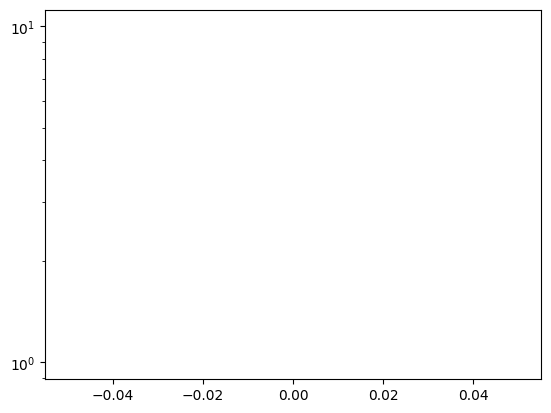

In [36]:
sns.scatterplot(data=df, x="alcoholism", y='social_protection')
plt.yscale('log')

In [37]:
# show confusion matrix to see correlation of indicators  
df[dict_indicators.values()].corr()

,social_protection,literacy,CO2,alcoholism
social_protection,NaN,NaN,NaN,NaN
literacy,NaN,NaN,NaN,NaN
CO2,NaN,NaN,NaN,NaN
alcoholism,NaN,NaN,NaN,NaN


In [29]:
# split data into training and testing set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[df.columns[2:-1]], df[df.columns[-1]], test_size=0.1, random_state=42)

# fit the model 
reg = sklearn.linear_model.LinearRegression().fit(X_train, y_train)


In [30]:
# predict on the model
y_pred = reg.predict(X_test)

In [31]:
y_pred, y_test

(array([2.99613514, 3.51358277, 2.97189532, 3.6296929 , 4.13045431,
        4.63932104]),
 0      3.628090
 49     0.409130
 237    2.880603
 131    3.168600
 247    4.728616
 258    5.151493
 Name: alcoholism, dtype: float64)

Text(0, 0.5, 'Real value')

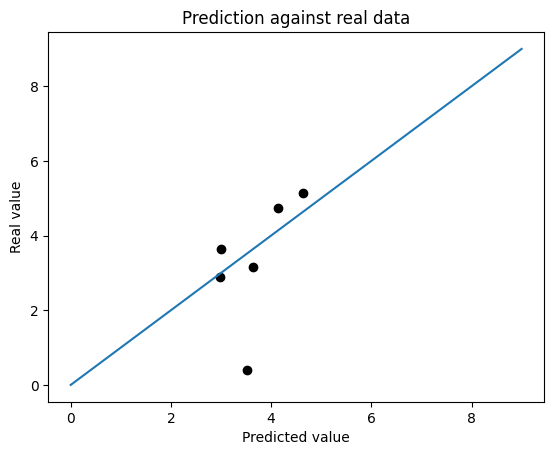

In [32]:
# plot the prediction on alcoholism against real data
plt.plot(y_pred, y_test, "ko")
plt.plot(range(10), range(10))
plt.title('Prediction against real data')
plt.xlabel('Predicted value')
plt.ylabel('Real value')